In [1]:
#this code allows all raw code to be toggled off

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
#i think this is to make ctrl-q a shortcut for clearing all content

%%javascript


IPython.keyboard_manager.command_shortcuts.add_shortcut('ctrl-q', {
    help: 'Clear all output',               // This text will show up on the help page (CTRL-M h or ESC h)
    handler: function (event) {             // Function that gets invoked
        if (IPython.notebook.mode == 'command') {
            IPython.notebook.clear_all_output();
            return false;
        }
        return true;                   
    }
  });

<IPython.core.display.Javascript object>

In [1]:
#ONE
#import data file, do conversions in python
import csv
with open('temp and co2 since 1958.csv', 'r') as f:
    reader = csv.reader(f)
    sonif1 = list(reader)

In [2]:
#TWO
#to convert entries from imported csv files to integers and floats
years = [int(row[0]) for row in sonif1]
temp = [float(row[1]) for row in sonif1]
co2 = [float(row[2]) for row in sonif1]

In [3]:
#THREE
#this is to convert temp anomalies in hundredth deg. C deviations from 1951-1980 global avg (57.2 deg F)
#to absolut deg F
temps = [(x/100 * 1.8)+57.2 for x in temp]

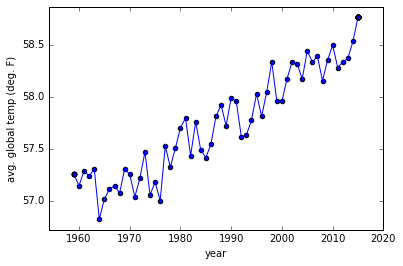

In [4]:
#FOUR
#to import the appropriate tools for graphing
import matplotlib.pyplot as plt
import numpy as np

#for some reason, this seems to be necessary code as well
%matplotlib inline

x = years
min_x = min(years) - 5
max_x = max(years) + 5
y = temps
min_y = min(temps) - .1
max_y = max(temps) + .1
plt.ylabel('avg. global temp (deg. F)')
plt.xlabel('year')

#adds line to scatterplot
line, = plt.plot(x, y, '-')
#defines range of each axis
plt.axis([min_x, max_x, min_y, max_y])
#defines plot type (the term 'plot' will give line)
plt.scatter(x, y)
#shows the graph
plt.show()


Processed 10 datapoints
Processed 20 datapoints
Processed 30 datapoints
Processed 40 datapoints
Processed 50 datapoints
Processed 60 datapoints
Processed 70 datapoints
Processed 80 datapoints
Done!


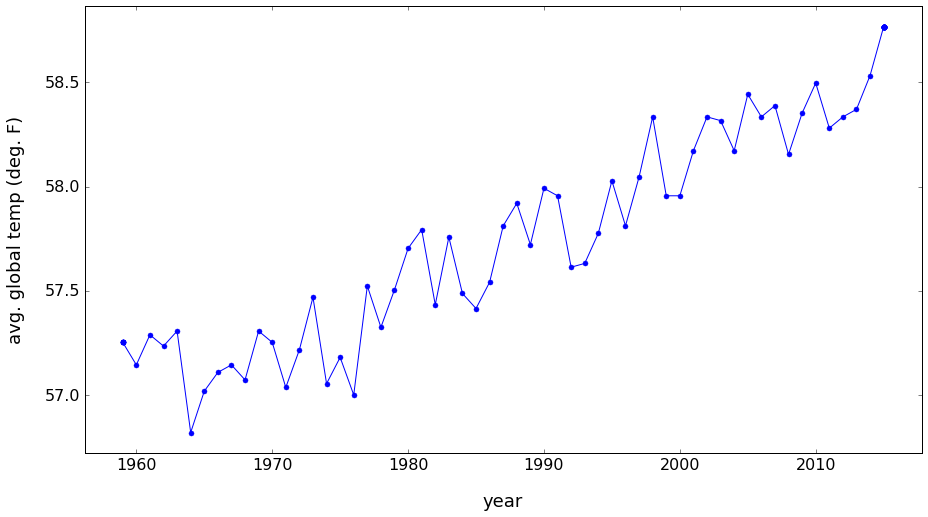

In [5]:
"""
FIVE
THIS IS THE ORIGINAL ANIMATION CODE THAT JORDAN FIXED. IT WORKS FOR ONE Y VARIABLE.
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def make_animation(xdata, ydata, file_name):
    def update_line(index):
        if not index%10 and index != 0:
            print("Processed {} datapoints".format(index))
        line.set_data(xdata[:index+1], ydata[:index+1])

    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111) ## 111: sublot occupies whole figure
    line, = ax.plot([], [], 'b.', ls='-', linewidth=1.0, ms=10)
    
    def setup_axes():
        """Axis dimensions are the range of the data plus 5% in either direction"""
        min_y = min(ydata)
        max_y = max(ydata)
        range_y = 1.0*(max_y - min_y)
        min_x = min(xdata)
        max_x = max(xdata)
        range_x = 1.0*(max_x - min_x)

        min_y_axis = (min_y - range_y/20)
        max_y_axis = (max_y + range_y/20)
        min_x_axis = (min_x - range_x/20)
        max_x_axis = (max_x + range_x/20)

        ax.set_ylim(min_y_axis, max_y_axis)
        ax.set_xlim(min_x_axis, max_x_axis)

    setup_axes()
    
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlabel('year', fontsize=18)
    plt.ylabel('avg. global temp (deg. F)', fontsize=18)
    ax.xaxis.labelpad = 20
    ax.yaxis.labelpad = 20   
        
    DELAY_BETWEEN_FRAMES_MS = 200 # milliseconds between frames
    ani = animation.FuncAnimation(fig, update_line, len(xdata),
         interval=DELAY_BETWEEN_FRAMES_MS)
    
    def preview_line():
        line.set_data(xdata, ydata)
        #plt.show()
        line.set_data([], [])

    preview_line()

    ani.save(file_name)
    #plt.show()

    print("Done!")
    
make_animation(years, temps, 'june21A.mp4')

In [5]:
#1. import and define data - to be used for visual graphs and audio generation
import csv
data = []
with open("temp and co2 since 1958.csv") as fp:
    for row in csv.reader(fp):
        data.append(row)
years = [int(row[0]) for row in data]
temp = [float(row[1]) for row in data]
#this is to convert temp anomalies in hundredth deg. C deviations from 1951-1980 global avg (57.2 deg F)
#to absolut deg F
temps = [(x/100 * 1.8)+57.2 for x in temp]

#this assigns the min and max values for the whole range, 1880 to 2014
mintemp = min(temps)
maxtemp = max(temps)

In [6]:
#SIX
#THIS IS THE START OF THE SYNCED UP STUFF; this speed value is what calibrated the sound and visual animation
speed=1.5

Processed 10 datapoints
Processed 20 datapoints
Processed 30 datapoints
Processed 40 datapoints
Processed 50 datapoints
Processed 60 datapoints
Processed 70 datapoints
Processed 80 datapoints


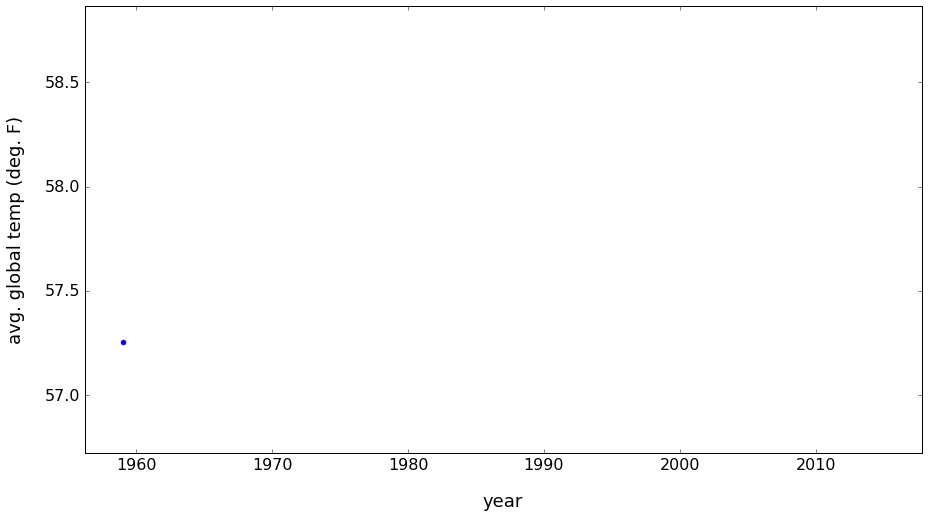

In [7]:
#SEVEN
#this defines ani to then be displayed as video in html
#the value of speed set above will determine rate of video; speed is then used below for midi generation

from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


#def make_animation(xdata, ydata, file_name):
def update_line(index):
    if not index%10 and index != 0:
        print("Processed {} datapoints".format(index))
    line.set_data(x[:index+1], y[:index+1])

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111) ## 111: sublot occupies whole figure
line, = ax.plot([], [], 'b.', ls='-', linewidth=1.0, ms=10)
    
def setup_axes():
    """Axis dimensions are the range of the data plus 5% in either direction"""
    min_y = min(y)
    max_y = max(y)
    range_y = 1.0*(max_y - min_y)
    min_x = min(x)
    max_x = max(x)
    range_x = 1.0*(max_x - min_x)

    min_y_axis = (min_y - range_y/20)
    max_y_axis = (max_y + range_y/20)
    min_x_axis = (min_x - range_x/20)
    max_x_axis = (max_x + range_x/20)

    ax.set_ylim(min_y_axis, max_y_axis)
    ax.set_xlim(min_x_axis, max_x_axis)

setup_axes()
    
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('year', fontsize=18)
plt.ylabel('avg. global temp (deg. F)', fontsize=18)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20   
        
DELAY_BETWEEN_FRAMES_MS = 500*speed # milliseconds between frames
ani = animation.FuncAnimation(fig, update_line, len(x), interval=DELAY_BETWEEN_FRAMES_MS)
    
#def preview_line():
    #line.set_data(x, y)
    #plt.show()
    #line.set_data([], [])

#preview_line()

    #ani.save(file_name)
#plt.show()

#print("Done!")

HTML(ani.to_html5_video())
    
#make_animation(years, temps, 'nosave.mp4')

In [8]:
#EIGHT
#THIS IS THE CODE TO SET THE RANGE OF MIDI NOTES
#would be nice to generalize this so that the user can enter the data to be midified
midinotes = []
#n = float(input('for how many seconds do you want your sequence to play? '))
#dur = n/len(tempslice)
#print('each note will play for ',dur,' seconds')

mintemps = min(temps)
maxtemps = max(temps)

mn = int(input('enter minimum midinote: '))
mx = int(input('enter maximum midinote: '))
for i in range(0,len(temps)):
    ratio = (temps[i] - mintemps)/(maxtemps - mintemps)
    midinotes.append(ratio * (mx - mn) + mn )
    
#NOW WE NEED TO INSERT ONE SILENT TONE AT THE BEGINING
#midinotes.insert(0,0)   TRY GETTING RID OF THIS - GOING TO USE A DIFFERENT METHOD
#THIS IS CODE TO MAKE THE NOTES INTEGERS
midinotestemps = []
for item in midinotes:
    midinotestemps.append(int(item))

enter minimum midinote: 30
enter maximum midinote: 126


In [9]:
#NINE
#THIS GENERATES MIDI FILE FROM FILE DEFINED IN CODE ABOVE
#Import the library

from midiutil.MidiFile3 import MIDIFile

# Create the MIDIFile Object with 1 track
MyMIDI = MIDIFile(1)

# Tracks are numbered from zero. Times are measured in beats.

#FOR SOME REASON,  THESE TWO LINES NEED TO BE RUN FIRST WHILE OFF, THEN ON WILL WORK SPORADICALLY
# Add track name and tempo.
#MyMIDI.addTrackName(track,time,"Sample Track")
#MyMIDI.addTempo(track,time,360)

blip = len(midinotestemps)
blips = blip - 1
bl = blips-20

for i in range(0,4): ##this makes the first several notes silent
# Add a note. addNote expects the following information:
    track = 0
    channel = 0
    pitch = midinotestemps[i]
    time = i*speed
    duration = 1
    volume = 0
    # Now add the note.
    MyMIDI.addNote(track,channel,pitch,time,duration,volume)

for i in range(5,bl):
# Add a note. addNote expects the following information:
    track = 0
    channel = 0
    pitch = midinotestemps[i]
    time = i*speed
    duration = 1
    volume = 100
    # Now add the note.
    MyMIDI.addNote(track,channel,pitch,time,duration,volume)

for i in range(bl,blips): ##this makes the last several notes silent
# Add a note. addNote expects the following information:
    track = 0
    channel = 0
    pitch = midinotestemps[i]
    time = i*speed ##adjusting this number from 1 will change the speed
    duration = 1
    volume = 0
    # Now add the note.
    MyMIDI.addNote(track,channel,pitch,time,duration,volume)
    
for i in range(blips+1,blips+5): ##this makes the first several notes silent
# Add a note. addNote expects the following information:
    track = 0
    channel = 0
    pitch = midinotestemps[i-(blips+1)]
    time = i*speed
    duration = 1
    volume = 0
    # Now add the note.
    MyMIDI.addNote(track,channel,pitch,time,duration,volume)

for i in range(blips+7,bl+blips+1): ##removing one unit (blips+7 instead of 6) helped snyc this
# Add a note. addNote expects the following information:
    track = 0
    channel = 0
    pitch = midinotestemps[i-(blips+1)]
    time = i*speed
    duration = 1
    volume = 100
    # Now add the note.
    MyMIDI.addNote(track,channel,pitch,time,duration,volume)

for i in range(bl+blips+1,blips+blips+1): ##this makes the last several notes silent
# Add a note. addNote expects the following information:
    track = 0
    channel = 0
    pitch = midinotestemps[i-(blips+1)]
    time = i*speed ##adjusting this number from 1 will change the speed
    duration = 1
    volume = 0
    # Now add the note.
    MyMIDI.addNote(track,channel,pitch,time,duration,volume)

# Now add the note.
#MyMIDI.addNote(track,channel,pitch,time,duration,volume)

# And write it to disk.
binfile = open("june21H.mid", 'wb')
MyMIDI.writeFile(binfile)
binfile.close()

In [10]:
#TEN
#this is the main one for playing simultaneously, IN OTHER WORDS, THE KEY CODE!!!!

import pygame
pygame.init()

pygame.mixer.music.load("june21H.mid") #THIS NEEDS TO BE CHECKED - CALL ON PROPER MIDI FILE
pygame.mixer.music.play (loops=1) #a value of -1 for loops makes it loop indefinitely; 0 adds one repeat

HTML(ani.to_html5_video())

#sys.stdout.flush() # <- *** it goes here ***
#time.sleep(3)
#clear_output()
#clear_output(wait=100)

In [38]:
#CODE TO TURN OFF THE SOUND. FILE NAME BELOW NEEDS TO MATCH WHAT IS PLAYING

import time
import sys

stoptime = float(input("How many more seconds of sound graph would you like to hear? "))
if stoptime >= 0:
    sleeptime=stoptime
else:
    sleeptime = 0
time.sleep(sleeptime)
pygame.mixer.music.load("june20test2.mid")
time.sleep(0.5)
print ("Ahhh, silence . . . .")

#pygame.mixer.music.load("may20test2.mid")

How many more seconds of sound graph would you like to hear? 1
Ahhh, silence . . . .


In [34]:
pygame.init()

pygame.mixer.music.load("june20test2.mid")
pygame.mixer.music.play()

In [37]:
import pygame
pygame.init()

pygame.mixer.music.load("june20test2.mid")
pygame.mixer.music.play(loops=0)

In [40]:
import time
import sys

stoptime = float(input("How many more seconds of sound graph would you like to hear? "))
if stoptime >= 0:
    sleeptime=stoptime
else:
    sleeptime = 0
time.sleep(sleeptime)
pygame.mixer.music.load("june20test2.mid")
time.sleep(0.5)
print ("Ahhh, silence . . . .")

#pygame.mixer.music.load("may20test2.mid")

How many more seconds of sound graph would you like to hear? 2
Ahhh, silence . . . .


In [41]:
from IPython.display import clear_output

In [ ]:
#to stop the sound
pygame.mixer.music.stop()

In [ ]:
import time
import sys

print ("Please enter your name.")
#userName=raw_input();
print ("Now let's wait a few seconds, {}.")#.format(userName)
#sys.stdout.flush() # <- *** it goes here ***
time.sleep(3)
print ("Did you lose your patience?")

In [ ]:
%%javascript


IPython.keyboard_manager.command_shortcuts.add_shortcut('ctrl-q', {
    help: 'Clear all output',               // This text will show up on the help page (CTRL-M h or ESC h)
    handler: function (event) {             // Function that gets invoked
        if (IPython.notebook.mode == 'command') {
            IPython.notebook.clear_all_output();
            return false;
        }
        return true;                   
    }
  });

In [ ]:
from IPython.display import clear_output

In [ ]:
clear_output()

In [ ]:
    temperature = float(input('What is the temperature? '))
    if temperature > 70:
        print('Wear shorts.')
    else:
        print('Wear long pants.')
    print('Get some exercise outside.')

In [ ]:
speedset = (input("How fast would you like your animation to play (type very or fast or medium or slow)? "))
def letterGrade(speedset):
    if speedset == 'very':
        letter = 4
    elif speedset == 'fast':
        letter = 2.5
    elif speedset == 'medium':
        letter = 1
    elif speedset == 'slow':
        letter = 0.5
    else:
        letter = 1
    return letter

letterGrade(speedset)

In [ ]:
speedset = (input("How many pounds does your suitcase weigh? "))

In [ ]:
def letterGrade(score):
    if score >= 90:
        letter = 'A'
    elif score >= 80:
        letter = 'B'
    elif score >= 70:
        letter = 'C'
    elif score >= 60:
        letter = 'D'
    else:
        letter = 'F'
    return letter